In [1]:
import torch
from load_data import *

In [2]:
device = torch.device('cuda:0')

# Load Dataset
- load_adult_data
- load_german_data
- load_bank_data
- load_compas_data

In [93]:
Xtr, Xte, ytr, yte, Ztr, Zte = load_bank_data()
ytr = ytr.astype('float32').reshape((-1,1))
yte = yte.astype('float32').reshape((-1,1))

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


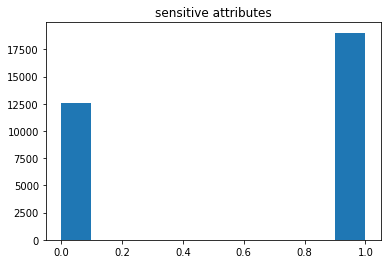

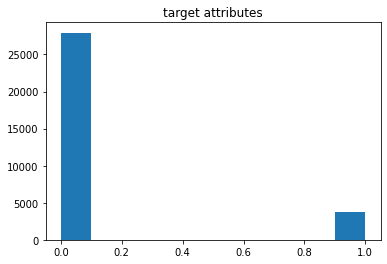

In [94]:
import matplotlib.pyplot as plt
plt.hist(Ztr[:,0])
plt.title("sensitive attributes")
plt.show()
plt.hist(ytr)
plt.title("target attributes")
plt.show()

In [5]:
zy = Ztr + 2*ytr

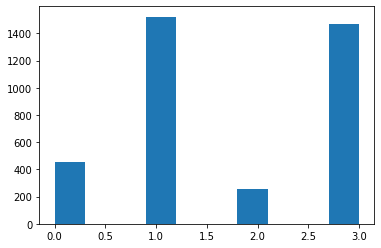

In [6]:
plt.hist(zy[:,0])
plt.show()

- 위의 Graph 를 보면, z 와 y 의 correlation 이 굉장히 높음을 확인할 수 있음

In [95]:
print("sensitive ratio: ",sum(Ztr==0)/len(Ztr))
print("training default: ", sum(ytr==0)/len(ytr))
print("test default: ", sum(yte==0)/len(yte))

sensitive ratio:  [0.39861598]
training default:  [0.8828009]
test default:  [0.88351519]


In [96]:
print('# training samples:', Xtr.shape)
print('# test samples:', Xte.shape)
print('# sensitive vars', Ztr.shape)
print('# output vars', ytr.shape)

# training samples: (31647, 46)
# test samples: (13564, 46)
# sensitive vars (31647, 1)
# output vars (31647, 1)


In [97]:
N1 = 200
Xtr1 = Xtr[:N1]
ytr1 = ytr[:N1]
Ztr1 = Ztr[:N1]
Xtr2 = Xtr[N1:]
ytr2 = ytr[N1:]
Ztr2 = Ztr[N1:]

In [98]:
nn = np.unique(Xtr1,axis=0)
print(nn[0])
print(len(np.unique(Xtr1,axis=0)))
print(len(np.unique(Xtr,axis=0)))
print(Xtr.shape)


[0.         0.01315789 0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.0252135  0.         0.00363636 0.0490526
 0.         0.73333333 0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         0.         0.12155963]
200
31647
(31647, 46)


In [99]:
repeated_idx = np.argwhere(np.all(Xtr==nn[0],axis=1))

In [100]:
print(repeated_idx.flatten())

[18]


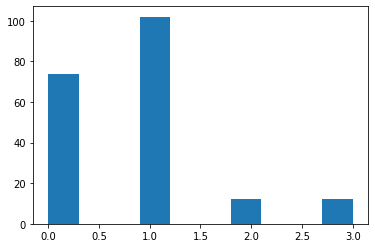

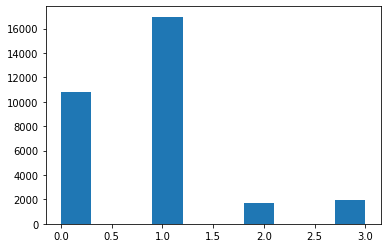

In [101]:
zy1 = Ztr1 + 2*ytr1
plt.hist(zy1[:,0])
plt.show()
zy2 = Ztr2 + 2*ytr2
plt.hist(zy2[:,0])
plt.show()

In [11]:
np.unique(Ztr)

array([0, 1])

In [12]:
Ztr.shape

(3694, 1)

In [102]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [103]:
from fairNN_train import *
from load_data import *

In [104]:
class Args:
    def __init__(self):
        self.epochs = 100
#         self.max_epochs = None
        self.AL_iters = 10 # AL batch 몇 번 뽑는지?
        self.AL_batch = 32 # AL 시에 select 되는 데이터 수
        self.batch_size = 32
        self.AL_select = 'acc'
#         self.AL_valid = 32
        
    def print_args(self):
        print("train epochs/batch: {}/{}".format(self.epochs,self.batch_size))
        print("AL iters/batch: {}/{}".format(self.AL_iters,self.AL_batch))
        print("AL selection is based on ", self.AL_select)

In [105]:
args = Args()

In [106]:
train_data = NPsDataSet(Xtr1, ytr1, Ztr1)
train_loader = DataLoader(train_data, batch_size=args.batch_size, shuffle=True, drop_last=True)

In [107]:
from fair_eval import *

In [108]:
zZtr2 = transform_dum2cat(Ztr2)
select_data = NPsDataSet(Xtr2, ytr2, zZtr2)
select_loader = DataLoader(select_data, batch_size=args.batch_size, shuffle=False, drop_last=False)

In [109]:
test_data = NPsDataSet(Xte, yte, Zte)
test_loader = DataLoader(test_data, batch_size=args.batch_size, shuffle=False, drop_last=False)

- gradient calculation for unlabeled set
- expectation 
- https://discuss.pytorch.org/t/how-to-efficiently-compute-gradient-for-each-training-sample/60001/2 
- https://github.com/cybertronai/autograd-hacks#per-example-gradients 
- https://tutorials.pytorch.kr/intermediate/tensorboard_tutorial.html

# Group Selection Part

## Test Group Performance

## find examples for the worst group

In [2]:
from fairAL_utils import *

## retraining models

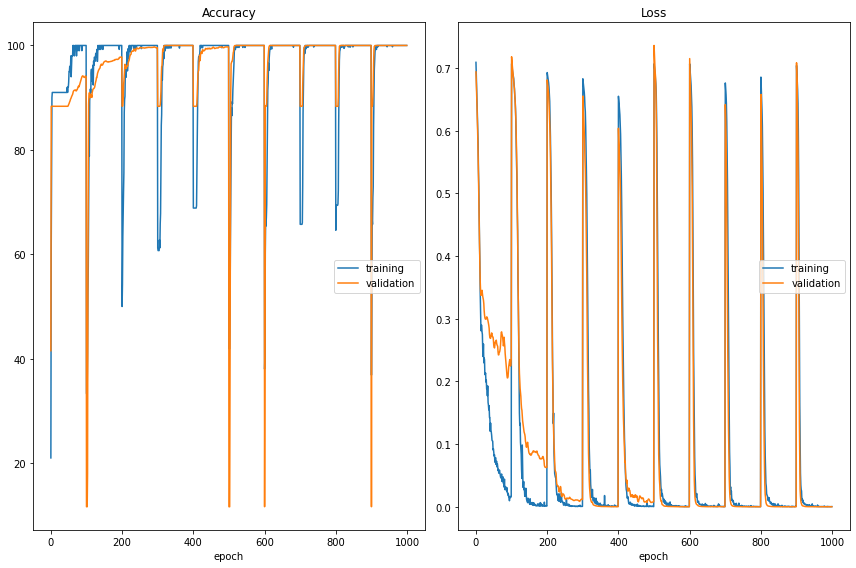

Accuracy
	training         	 (min:   21.000, max:  100.000, cur:  100.000)
	validation       	 (min:   11.648, max:  100.000, cur:  100.000)
Loss
	training         	 (min:    0.000, max:    0.709, cur:    0.000)
	validation       	 (min:    0.000, max:    0.736, cur:    0.000)
Finished Training
0.0 : loss 1.266296408175549e-06 / acc 100.0
1.0 : loss 9.91074671219394e-07 / acc 100.0


In [111]:
clf,f_train,f_select = train_AL_valid(train_loader, select_loader, device, args, test_loader, \
                                      from_scratch = True, random_sel = False,val_ratio = 0.5)

In [1]:
clf2,_,_ = train_AL(train_loader, select_loader, device, args, test_loader, from_scratch = True, random_sel = True)

NameError: name 'train_AL' is not defined

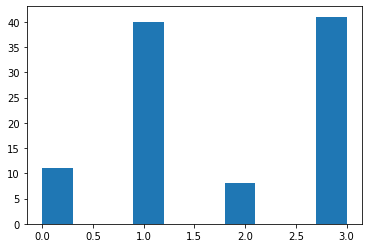

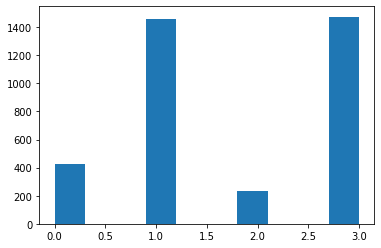

In [36]:
zy1 = train_loader.dataset.tensors[2] + 2*train_loader.dataset.tensors[1]
plt.hist(zy1[:,0])
plt.show()
zy2 = select_loader.dataset.tensors[2] + 2*select_loader.dataset.tensors[1]
plt.hist(zy2[:,0])
plt.show()

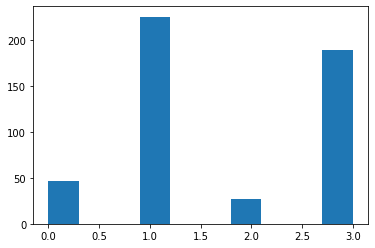

In [23]:
zy3 = f_train.dataset.tensors[2] + 2*f_train.dataset.tensors[1]
plt.hist(zy3[:,0])
plt.show()

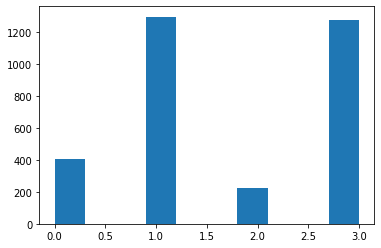

In [24]:
zy3 = f_select.dataset.tensors[2] + 2*f_select.dataset.tensors[1]
plt.hist(zy3[:,0])
plt.show()

In [25]:
clf_criterion = nn.BCELoss()
print("training performances")
test_groupwise(clf,train_loader, clf_criterion, device,args)
print(test_model(clf, train_loader, clf_criterion, device))
print("test performances")
test_groupwise(clf,test_loader, clf_criterion, device,args)
print(test_model(clf, test_loader, clf_criterion, device))
print("select performances")
test_groupwise(clf,select_loader, clf_criterion, device,args)
print(test_model(clf, select_loader, clf_criterion, device))

training performances
0.0 : loss 0.9118442535400391 / acc 61.11111068725586
1.0 : loss 0.6980008482933044 / acc 54.26829147338867
(tensor(0.7423), tensor(55.2083))
test performances
0.0 : loss 1.3807878494262695 / acc 51.070335388183594
1.0 : loss 0.7848524451255798 / acc 54.41527557373047
(tensor(0.9079), tensor(53.7247))
select performances
0.0 : loss 1.3938696384429932 / acc 47.00598907470703
1.0 : loss 0.7655298709869385 / acc 53.89242935180664
(tensor(0.8857), tensor(52.5758))


In [40]:
clf_criterion = nn.BCELoss()
print("training performances")
test_groupwise(clf2,train_loader, clf_criterion, device,args)
print(test_model(clf2, train_loader, clf_criterion, device))
print("test performances")
test_groupwise(clf2,test_loader, clf_criterion, device,args)
print(test_model(clf2, test_loader, clf_criterion, device))
print("select performances")
test_groupwise(clf2,select_loader, clf_criterion, device,args)
print(test_model(clf2, select_loader, clf_criterion, device))

training performances
0.0 : loss 0.6433472037315369 / acc 63.157894134521484
0 tensor(0.6433) 0.0 0.0
1.0 : loss 0.6445794105529785 / acc 59.25925827026367
tensor(0.6433) tensor(0.6446) 0.0 1.0
(tensor(0.6514), tensor(58.3333))
test performances
0.0 : loss 0.6331877112388611 / acc 63.610313415527344
0 tensor(0.6332) 0.0 0.0
1.0 : loss 0.6538843512535095 / acc 59.27125549316406
tensor(0.6332) tensor(0.6539) 0.0 1.0
(tensor(0.6493), tensor(60.2273))
select performances
0.0 : loss 0.6532241106033325 / acc 59.879337310791016
0 tensor(0.6532) 0.0 0.0
1.0 : loss 0.6601974368095398 / acc 58.887752532958984
tensor(0.6532) tensor(0.6602) 0.0 1.0
(tensor(0.6589), tensor(59.0707))


# Inspect Methods

In [26]:
# from fairNN_train import *
epochs = 100
n_features = train_loader.dataset.tensors[0].shape[1]
clf = Classifier(n_features=n_features)
clf.to(device)
clf_criterion = nn.BCELoss()
clf_optimizer = optim.Adam(clf.parameters())
print(train_loader.dataset.tensors[0].size(0))

tr_loader, val_loader = train_valid_split(train_loader, train_loader.dataset.tensors[0].size(0),\
                                          val_ratio=0.5,random_seed=5)

print(tr_loader.dataset.tensors[0].size())
print(val_loader.dataset.tensors[0].size())

200
torch.Size([100, 7])
torch.Size([100, 7])


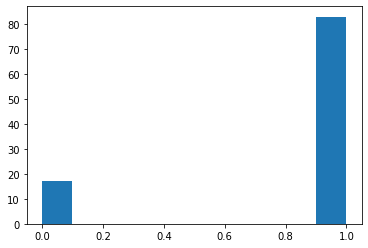

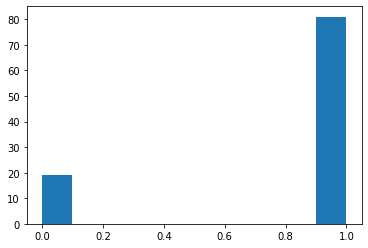

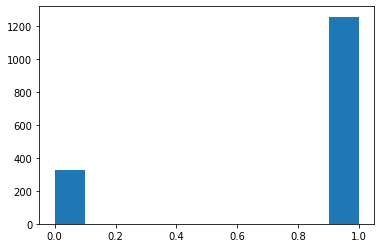

In [27]:
import matplotlib.pyplot as plt
tt = tr_loader.dataset.tensors[2].flatten()# +  tr_loader.dataset.tensors[1].flatten()*2
plt.hist(tt)
plt.show()
ss = val_loader.dataset.tensors[2].flatten() #+  val_loader.dataset.tensors[1].flatten()*2
plt.hist(ss)
plt.show()
uu = test_loader.dataset.tensors[2].flatten() #+  test_loader.dataset.tensors[1].flatten()*2
plt.hist(uu)
plt.show()

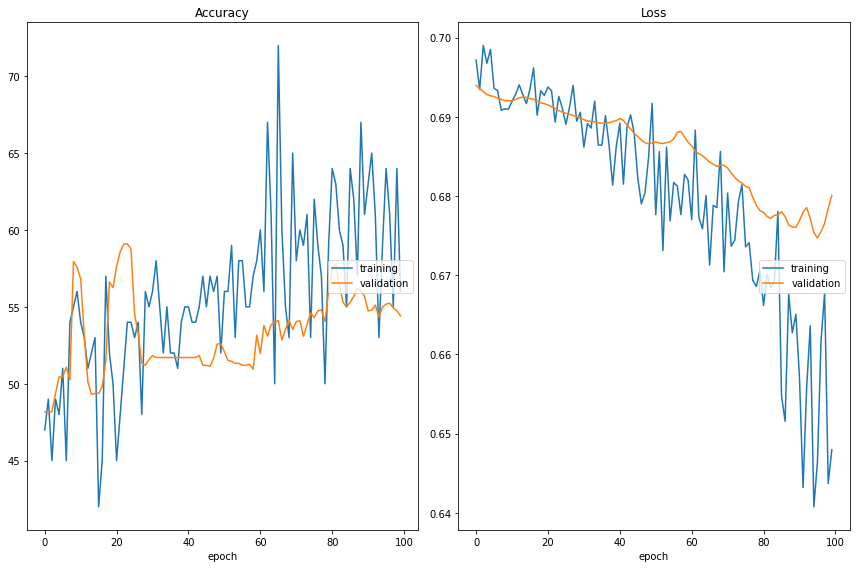

Accuracy
	training         	 (min:   42.000, max:   72.000, cur:   56.000)
	validation       	 (min:   48.169, max:   59.091, cur:   54.419)
Loss
	training         	 (min:    0.641, max:    0.699, cur:    0.648)
	validation       	 (min:    0.675, max:    0.694, cur:    0.680)
Finished Training


In [28]:
train_model(clf, tr_loader, clf_criterion, clf_optimizer, device, 100, test_loader, None)

In [64]:
args.AL_select

'acc'

In [71]:
def test_groupwise(clf, data_loader, clf_criterion, device,args):
    dlTensors = data_loader.dataset.tensors
    dldic = divide_groupsDL(dlTensors[0],dlTensors[1],dlTensors[2])
    losss = 0
    accs = 100.0
    sid = list(dldic.keys())[0]
    for did in dldic.keys():
        loss_v, acc_v = test_model_noz(clf, dldic[did],clf_criterion, device)
        print("{} : loss {} / acc {}".format(did, loss_v, acc_v))
        if args.AL_select == 'loss':
#             print(losss,loss_v,sid,did)
            if losss < loss_v:
                print(sid,did)
                sid = did
                losss = loss_v               
        else:
#             print(did,acc_v,accs)
            assert args.AL_select == 'acc'
#             print(accs > acc_v)
            if accs > acc_v:
#                 print(sid,did)
                sid = did
                accs = acc_v
    return sid, dldic

In [69]:
def cal_meangrad(clf, dataloader, criterion, device,normalize=True):
    
    for i,(x,y) in enumerate(dataloader):
        x = x.to(device)
        y = y.to(device)
        clf.zero_grad()
        outs = clf(x)
        criterion(outs,y).backward()
        tmp = []
        for param in clf.parameters():
            tmp.append(param.grad.flatten())
        grads_t = torch.cat(tmp)
        if i==0:
            grads = grads_t
        else:
            grads += grads_t
    prgrad_n = torch.norm(grads)
    if normalize:
        grads /= prgrad_n
    grads = grads.detach().cpu()
    return grads

In [30]:
_, _ = test_groupwise(clf, train_loader, clf_criterion, device, args)

0.0 : loss 0.5666709542274475 / acc 69.44444274902344
1.0 : loss 0.6656495928764343 / acc 54.878047943115234


In [31]:
_, _ = test_groupwise(clf, test_loader, clf_criterion, device, args)

0.0 : loss 0.6505141854286194 / acc 60.85626983642578
1.0 : loss 0.6877537965774536 / acc 52.74462890625


In [32]:
sid, dldic = test_groupwise(clf, val_loader, clf_criterion, device, args)
grads = cal_meangrad(clf, dldic[sid], clf_criterion, device,False)
ses,sidx = select_examples(clf, select_loader, clf_criterion, grads,device, args.AL_batch)

0.0 : loss 0.5886512398719788 / acc 63.157894134521484
1.0 : loss 0.664670467376709 / acc 51.85185241699219


In [33]:
grads0 = cal_meangrad(clf, dldic[0], clf_criterion, device,False)
grads1 = cal_meangrad(clf, dldic[1], clf_criterion, device,False)

In [34]:
print(grads0)
print(grads1)
print(torch.matmul(grads0,grads1))
print(torch.matmul(grads0,grads0))
print(torch.matmul(grads1,grads1))
print(sid)

tensor([0.0161, 0.0077, 0.0071,  ..., 0.0000, 0.0000, 0.2086])
tensor([-0.0364,  0.0222,  0.0202,  ...,  0.0000,  0.0000, -0.0073])
tensor(0.0555)
tensor(0.3383)
tensor(0.3315)
1.0


In [83]:
print(torch.matmul(grads0,grads0te))
print(torch.matmul(grads1,grads1te))

tensor(0.0360)
tensor(0.0059)


In [82]:
print(grads0te)
print(grads1te)
print(torch.matmul(grads0te,grads1te))
print(torch.matmul(grads0te,grads0te))
print(torch.matmul(grads1te,grads1te))
print(sid)

tensor([0.0000e+00, 7.5523e-04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
        1.0595e+00])
tensor([ 0.0000,  0.0022,  0.0000,  ...,  0.0000,  0.0000, -0.5502])
tensor(-0.3607)
tensor(1.8582)
tensor(1.2305)
1.0


In [35]:
train_loader2, select_loader2 = obtain_newDS(train_loader, select_loader, ses,sidx,args.batch_size)

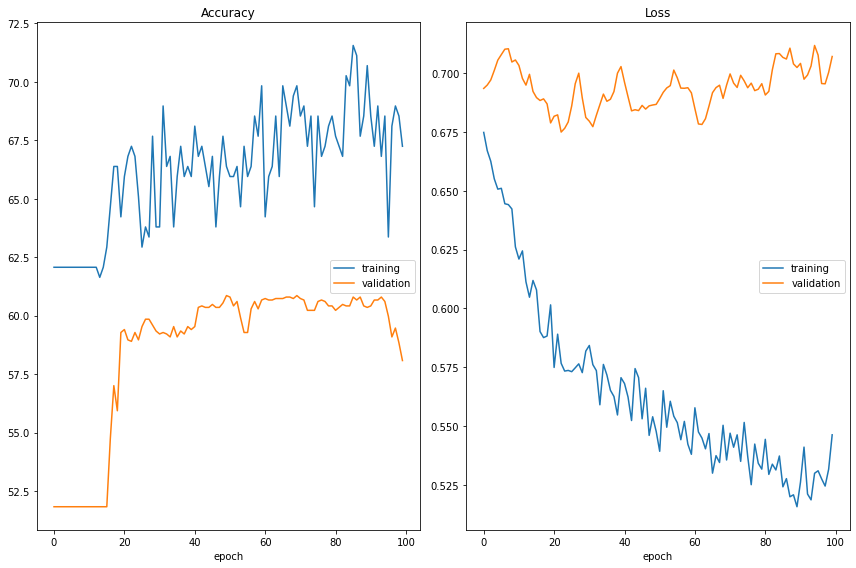

Accuracy
	training         	 (min:   61.638, max:   71.552, cur:   67.241)
	validation       	 (min:   51.831, max:   60.859, cur:   58.081)
Loss
	training         	 (min:    0.516, max:    0.675, cur:    0.546)
	validation       	 (min:    0.675, max:    0.712, cur:    0.707)
Finished Training


In [36]:
clf2 = Classifier(n_features=n_features)
clf2.to(device)
clf_criterion2 = nn.BCELoss()
clf_optimizer2 = optim.Adam(clf2.parameters())
liveloss = PlotLosses()
train_model(clf2, train_loader2, clf_criterion2,clf_optimizer2,device,100, test_loader,liveloss)

In [37]:
sid2, dldic2 = test_groupwise(clf2, test_loader, clf_criterion2, device, args)

0.0 : loss 0.7784196138381958 / acc 64.22018432617188
1.0 : loss 0.688477635383606 / acc 56.48369216918945


In [38]:
_, _ = test_groupwise(clf, test_loader, clf_criterion2, device, args)
_, _ = test_groupwise(clf2, test_loader, clf_criterion2, device, args)

0.0 : loss 0.6505141854286194 / acc 60.85626983642578
1.0 : loss 0.6877537965774536 / acc 52.74462890625
0.0 : loss 0.7784196138381958 / acc 64.22018432617188
1.0 : loss 0.688477635383606 / acc 56.48369216918945


In [39]:
_, _ = test_groupwise(clf, train_loader, clf_criterion2, device, args)
_, _ = test_groupwise(clf2, train_loader2, clf_criterion2, device, args)

0.0 : loss 0.5666709542274475 / acc 69.44444274902344
1.0 : loss 0.6656495928764343 / acc 54.878047943115234
0.0 : loss 0.45424333214759827 / acc 66.66666412353516
1.0 : loss 0.5227502584457397 / acc 69.89795684814453


In [40]:
_, _ = test_groupwise(clf, val_loader, clf_criterion2, device, args)
_, _ = test_groupwise(clf2, val_loader, clf_criterion2, device, args)

0.0 : loss 0.5886512398719788 / acc 63.157894134521484
1.0 : loss 0.664670467376709 / acc 51.85185241699219
0.0 : loss 0.43312814831733704 / acc 73.68421173095703
1.0 : loss 0.5653043985366821 / acc 72.83950805664062


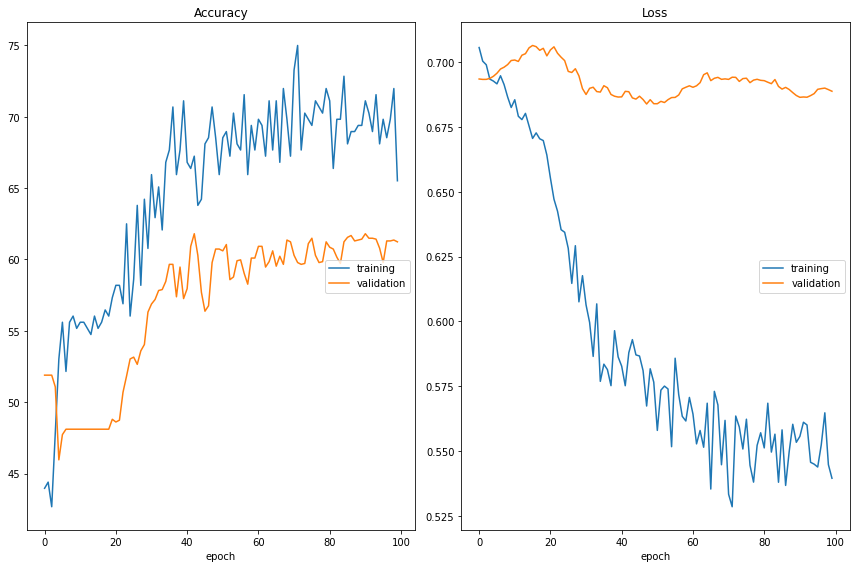

Accuracy
	training         	 (min:   42.672, max:   75.000, cur:   65.517)
	validation       	 (min:   45.960, max:   61.806, cur:   61.237)
Loss
	training         	 (min:    0.528, max:    0.706, cur:    0.539)
	validation       	 (min:    0.684, max:    0.706, cur:    0.689)
Finished Training


In [112]:
clf = Classifier(n_features=n_features)
clf.to(device)
clf_criterion = nn.BCELoss()
clf_optimizer = optim.Adam(clf.parameters())
liveloss = PlotLosses()
train_model(clf, train_loader2, clf_criterion,clf_optimizer,device,100, test_loader,liveloss)

In [65]:
def select_examples(clf,select_loader,criterion, grad_z, device, nsample = 32):
    aa = torch.topk(compute_gradsim(clf, select_loader, criterion, grad_z, device),nsample)
    ses = []
    for ts in select_loader.dataset.tensors:
        ses.append(ts[aa[1]])
    return ses,aa[1]

In [69]:
aa = torch.topk(compute_gradsim(clf, select_loader, clf_criterion, grads0, device),32)

In [75]:
print(aa[1])

tensor([ 599, 2741, 3164,  550, 1492, 1708, 1583, 3328, 3366, 1684, 1840, 2253,
        1172, 2977, 2392,  406, 2158,  975,  860, 2146, 2460, 2499,  808, 2480,
        1378, 1336,  794,  959, 2350, 2135, 1924, 2105])


In [78]:
print(select_loader.dataset.tensors[0][599])
print(select_loader.dataset.tensors[0][2741])
print(select_loader.dataset.tensors[0][3164])
print(select_loader.dataset.tensors[0][550])
print(select_loader.dataset.tensors[0][1492])

tensor([1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.2432, 1.0000])
tensor([1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2162, 0.0000])
tensor([1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.2703, 1.0000])
tensor([1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1892, 1.0000])
tensor([1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1892, 1.0000])


In [76]:
select_loader.dataset.tensors[0][aa[1]]

tensor([[1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.2432, 1.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2162, 0.0000],
        [1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.2703, 1.0000],
        [1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1892, 1.0000],
        [1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1892, 1.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1892, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1081, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1081, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1081, 0.0000],
        [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1081, 0.0000],
        [1

In [52]:
pred = clf(ses[0].to(device))
pred2 = clf2(ses[0].to(device))

In [46]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [82]:
print(len(np.unique(Xtr2,axis=1)))
print(Xtr2.shape)

3494
(3494, 7)


In [55]:
ses[0]

tensor([[0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0270, 1.0000],
        [0

In [53]:
pred.flatten()

tensor([0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632,
        0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632, 0.3632,
        0.3632, 0.3632, 0.3957, 0.3957, 0.3957, 0.3957, 0.3957, 0.3523, 0.3523,
        0.3523, 0.3523, 0.3523, 0.3523, 0.3523], device='cuda:1',
       grad_fn=<ViewBackward>)

In [54]:
pred2.flatten()

tensor([0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113,
        0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113, 0.0113,
        0.0113, 0.0113, 0.0252, 0.0252, 0.0252, 0.0252, 0.0252, 0.0092, 0.0092,
        0.0092, 0.0092, 0.0092, 0.0092, 0.0092], device='cuda:1',
       grad_fn=<ViewBackward>)

In [47]:
confusion_matrix(ses[1][:,0],(pred>0.5).float().detach().cpu().numpy()[:,0])

array([[32]])

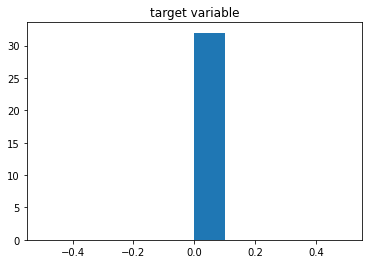

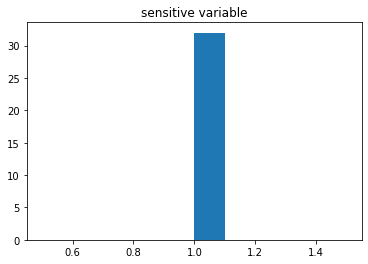

In [48]:
plt.title("target variable")
plt.hist(ses[1][:,0])
plt.show()
plt.title("sensitive variable")
plt.hist(ses[2][:,0])
plt.show()

torch.Size([32, 1])